# Loan Prediction using SVM 

## importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection

In [3]:
#loading the data
Loan_data = pd.read_csv('loandf.csv')
Loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analysing DataSet 

In [4]:
Loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
Loan_data.shape

(614, 13)

In [6]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#More information
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the description above i notice that there are some missing values in the LoanAmount, Loan_Amount_Term, Credit_History. So now the next thing todo is to comfirm and deal with them.

# Data Cleaning

In [8]:
#check to see the number of missing value per column
Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#dealing with missing value
#there are various method of dealing with missing values,in this case I am going to use the (drop) removal.

Loan_Data = Loan_data.dropna()

In [10]:
Loan_Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
Loan_Data.duplicated().sum()

0

Now all's good, no missing value and duplicates.

In [12]:
#remove unwanted column
Loan_Data = Loan_Data.drop(columns='Loan_ID')

# <b>Data transformation </b>
## Encoding values, replacing some values to make the dataset fit for our modelling 

In [13]:
#Loan_Status column; Replace Y=1, N=0
Loan_Data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

#Gender column; Replace Male=1, Female=0
Loan_Data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

#Married column; Replace Y=1, N=0
Loan_Data.replace({'Married':{'Yes':1,'No':0}},inplace=True)

#Eduaction; Replace; Graduate=1, Not-Graduate=0,
Loan_Data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

#Self_Employed, 
Loan_Data.replace({'Self_Employed':{'Yes':1,'No':0},},inplace=True)

#Property Area, 
Loan_Data.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},},inplace=True)



Loan_Data.to_csv('LoanData.csv')# save our  refined data 


In [14]:
LoanData = pd.read_csv('LoanData.csv')
LoanData

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
476,610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
477,611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
478,612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [15]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         480 non-null    int64  
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 48.9+ KB


In [16]:
#replace invalid value
LoanData.replace({'Dependents':{'3+':4}},inplace=True)

In [17]:
LoanData['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [18]:
#Dependents column
LoanData['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Data Visualization; univariate analysis and to see correlations between variables

<AxesSubplot: xlabel='Married', ylabel='count'>

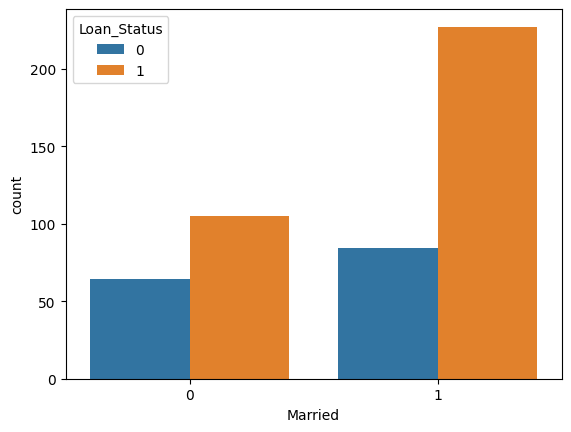

In [19]:
#Now lets see the correlation between Married and Loan Status
sns.countplot(x='Married', hue='Loan_Status',data=LoanData)

 Married people's Loan application gets approved more than Unmarried people.

<AxesSubplot: xlabel='Education', ylabel='count'>

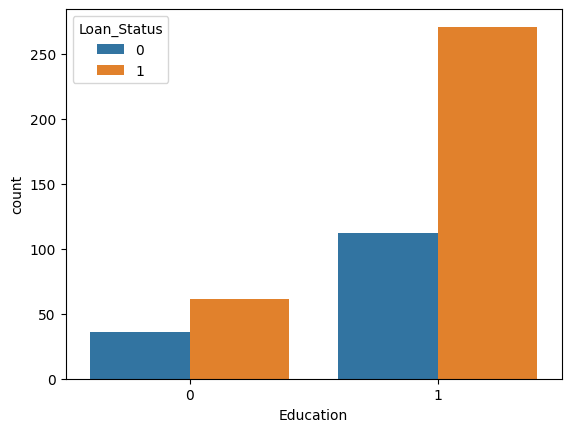

In [20]:
#Now lets see the correlation Eduaction and Loan Status
sns.countplot(x='Education', hue='Loan_Status',data=LoanData)

Loan application made by Graduates gets approved more than application by Non-Graduates.

<AxesSubplot: xlabel='Gender', ylabel='count'>

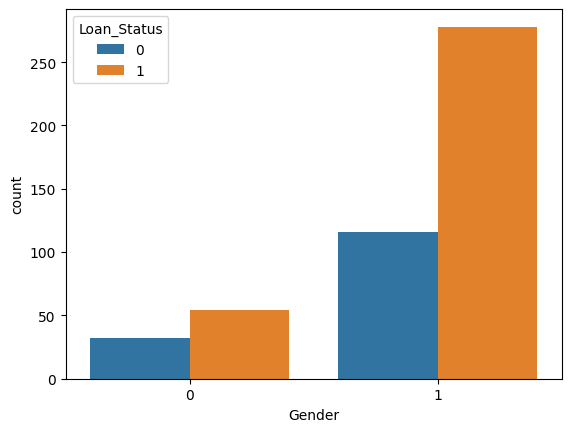

In [21]:
#Now lets see the Gender and Loan Status
sns.countplot(x='Gender', hue='Loan_Status',data=LoanData)

Loan application made by Male gets approved more than application by Female.

<AxesSubplot: xlabel='Dependents', ylabel='count'>

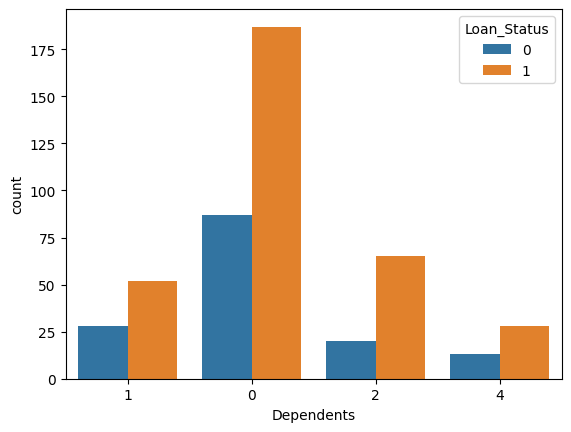

In [22]:
#Now lets see the Depandents Married and Loan Status
sns.countplot(x='Dependents', hue='Loan_Status',data=LoanData)

The Higher number of dependents a person has, the Lower the chances of Loan Approval.

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

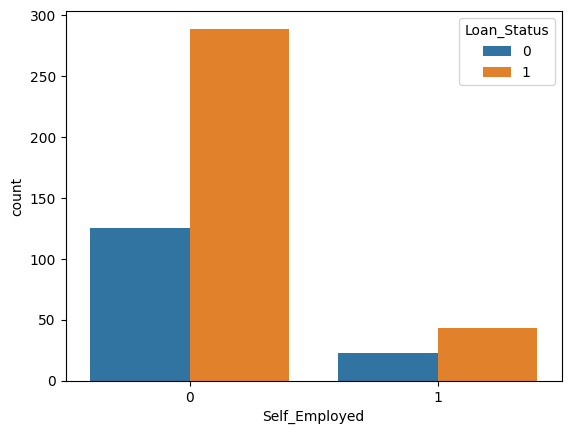

In [23]:
#Now lets see the Self_Employed and Loan Status
sns.countplot(x='Self_Employed', hue='Loan_Status',data=LoanData)

Loan application made by Self_Employed gets Denied more than application by Female.

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

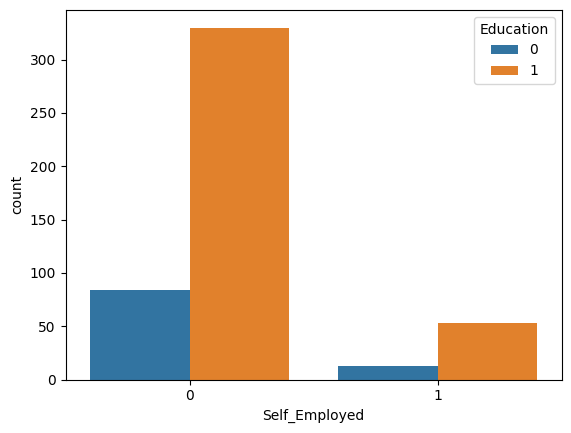

In [24]:
#Now lets see the Self_Employed and Eduaction
sns.countplot(x='Self_Employed', hue='Education',data=LoanData)

## spliting Features(X) and Target(Y) from Dataset

In [25]:
#separating features from Outcome

X = LoanData.drop(columns='Loan_Status')
X = X.drop(['Unnamed: 0'], axis = 1)
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1


In [26]:
Y = LoanData['Loan_Status']
Y.head(2)

0    0
1    1
Name: Loan_Status, dtype: int64

## Splitting the Datasets into Train and Test

In [27]:
#Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [29]:
from sklearn.svm import SVC

# Training using SVM model

In [30]:
model = SVC(C= .1,kernel='linear', gamma = 1)

In [31]:
#Training the SVM
model.fit(X_train,Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

## Model Evaluation to see how accurate our model is.


In [32]:
#Trianing Accuracy
X_train_prediction = model.predict(X_train)
traindataaccuracy = accuracy_score(X_train_prediction, Y_train)
traindataaccuracy

0.7962962962962963

In [33]:
#Testing Accuracy
X_test_prediction = model.predict(X_test)
testdataaccuracy = accuracy_score(X_test_prediction, Y_test)
testdataaccuracy

0.8333333333333334

## Now lets do Prediction

In [34]:

input_data = (1,0,0,1,0,1853,2840.0,114.0,360.0,1.0,0)

#Now i need to change the data(input_data) from tuple to numpy array; so that it can be mutable

input_data_numpy_array = np.asarray(input_data)

#now I reshape

input_data_reshape = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
#now predict

prediction

if(prediction[0]==0):
    print('Loan Application Denied')
else:
    print('Loan Application Approved')

Loan Application Approved


c:\Users\indra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
